# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [1]:
import pandas as pd
import zipfile
from datetime import datetime

### Load Data

In [2]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [3]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False


In [4]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,mZa9ls,0,23,True
1,mZa9ls,0,24,True
2,mZa9ls,0,25,True
3,mZa9ls,0,26,True
4,mZa9ls,0,27,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [5]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

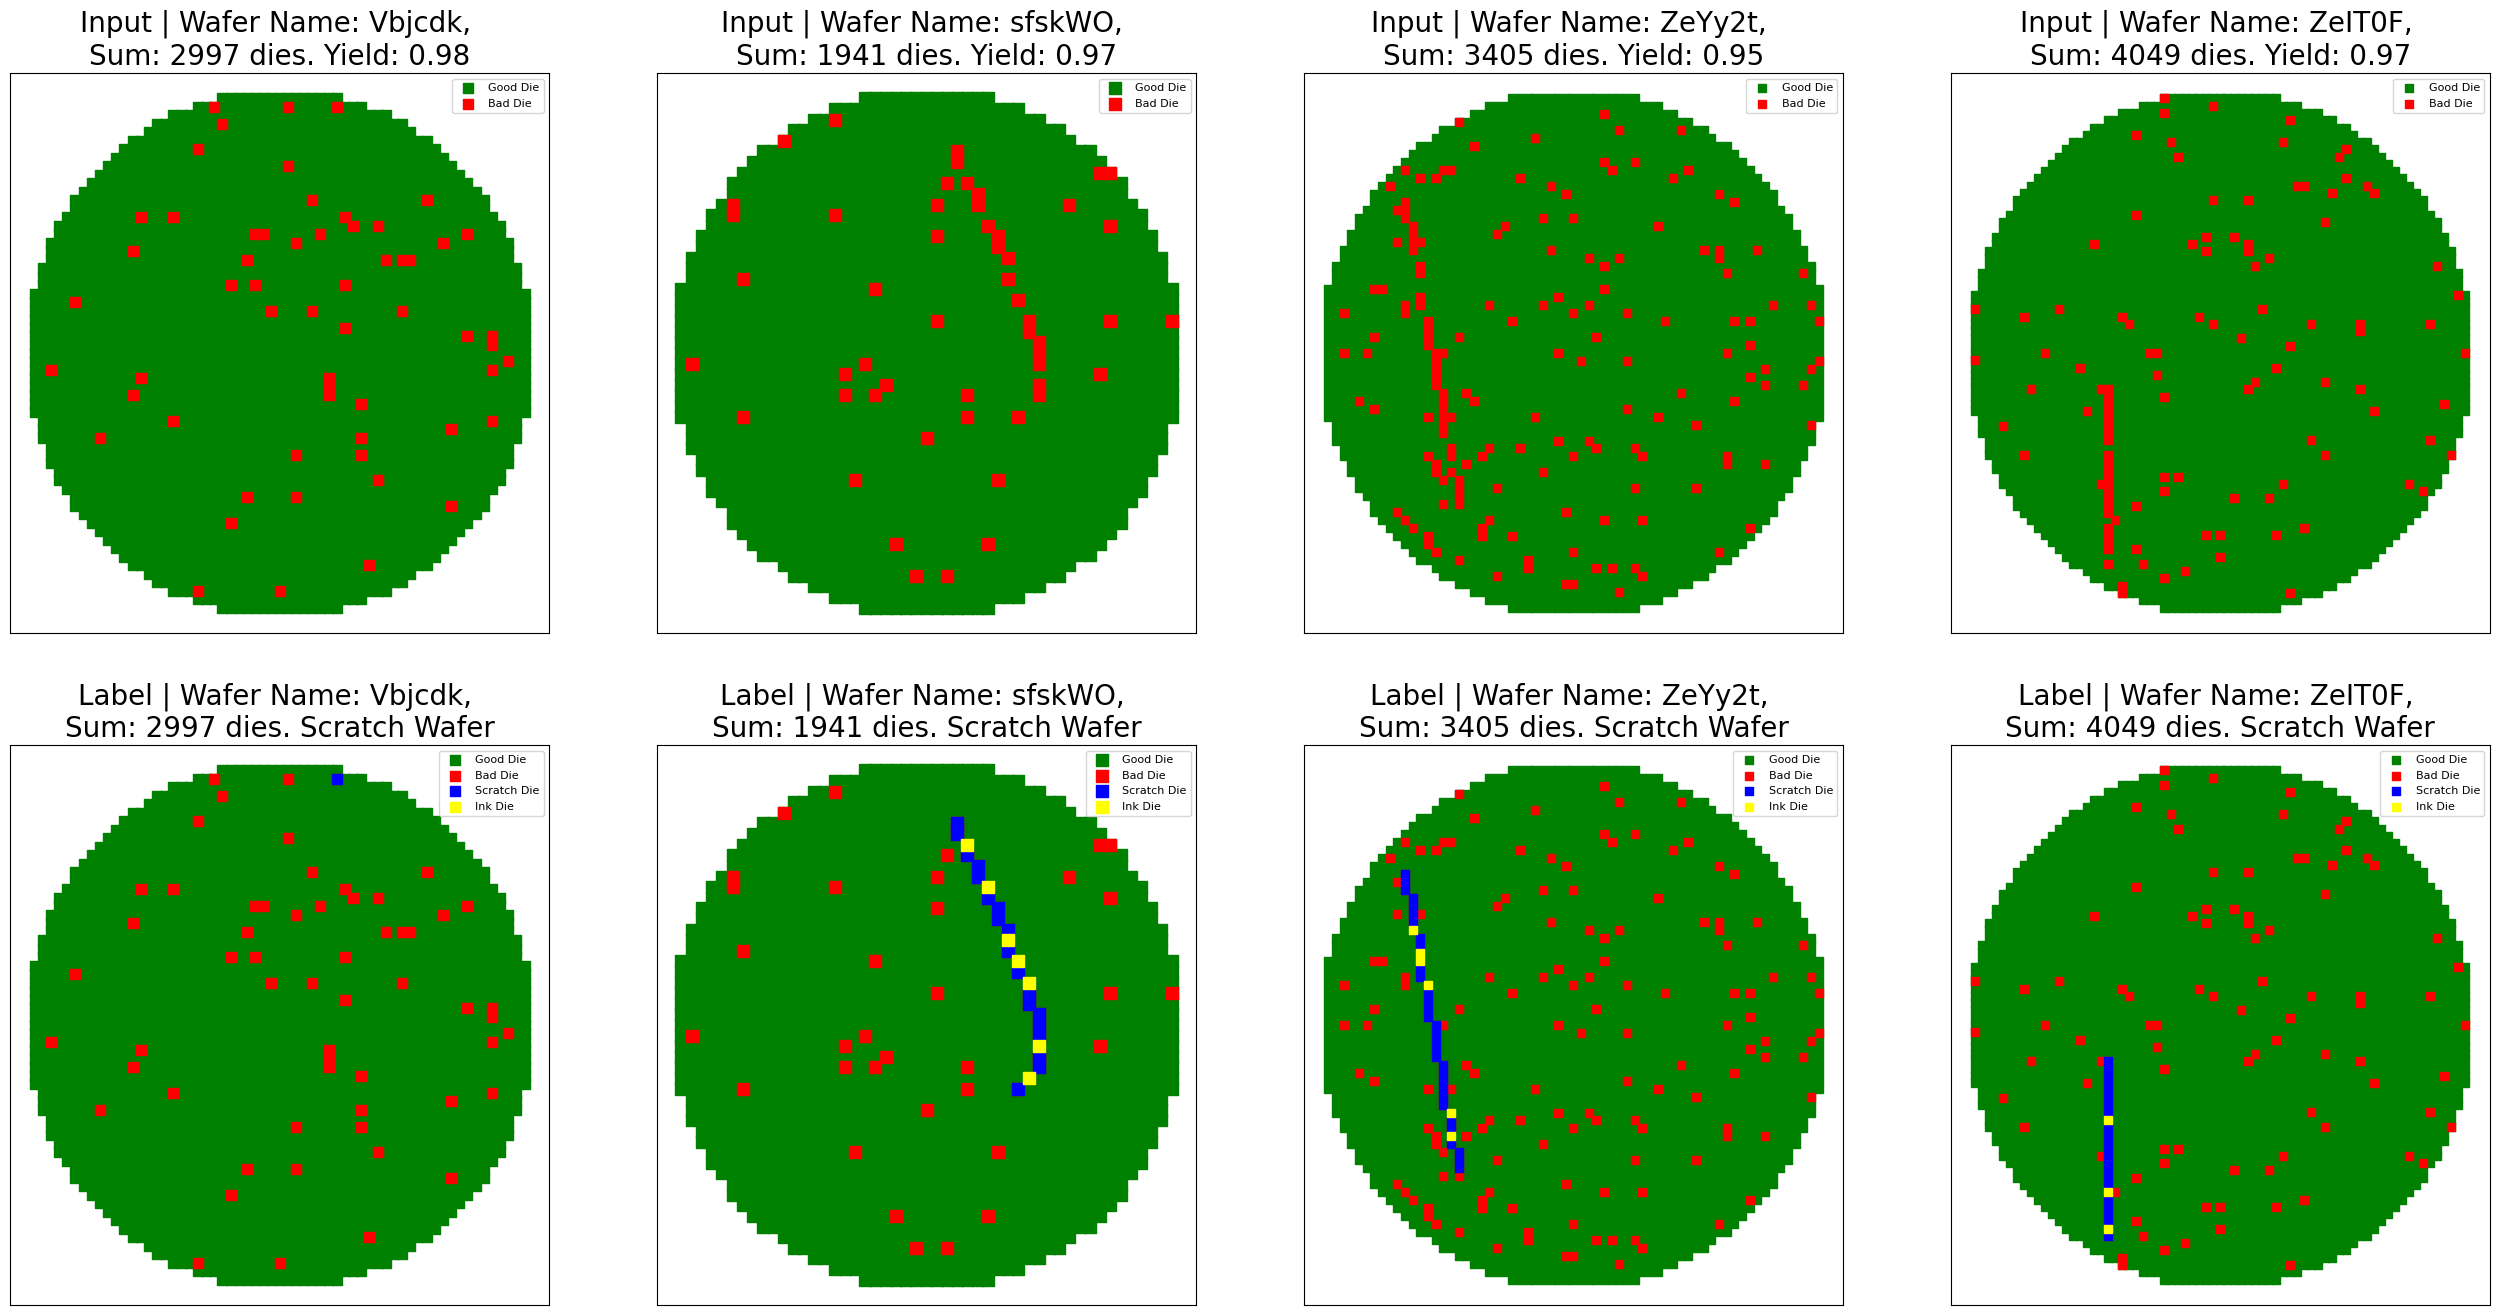

In [6]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

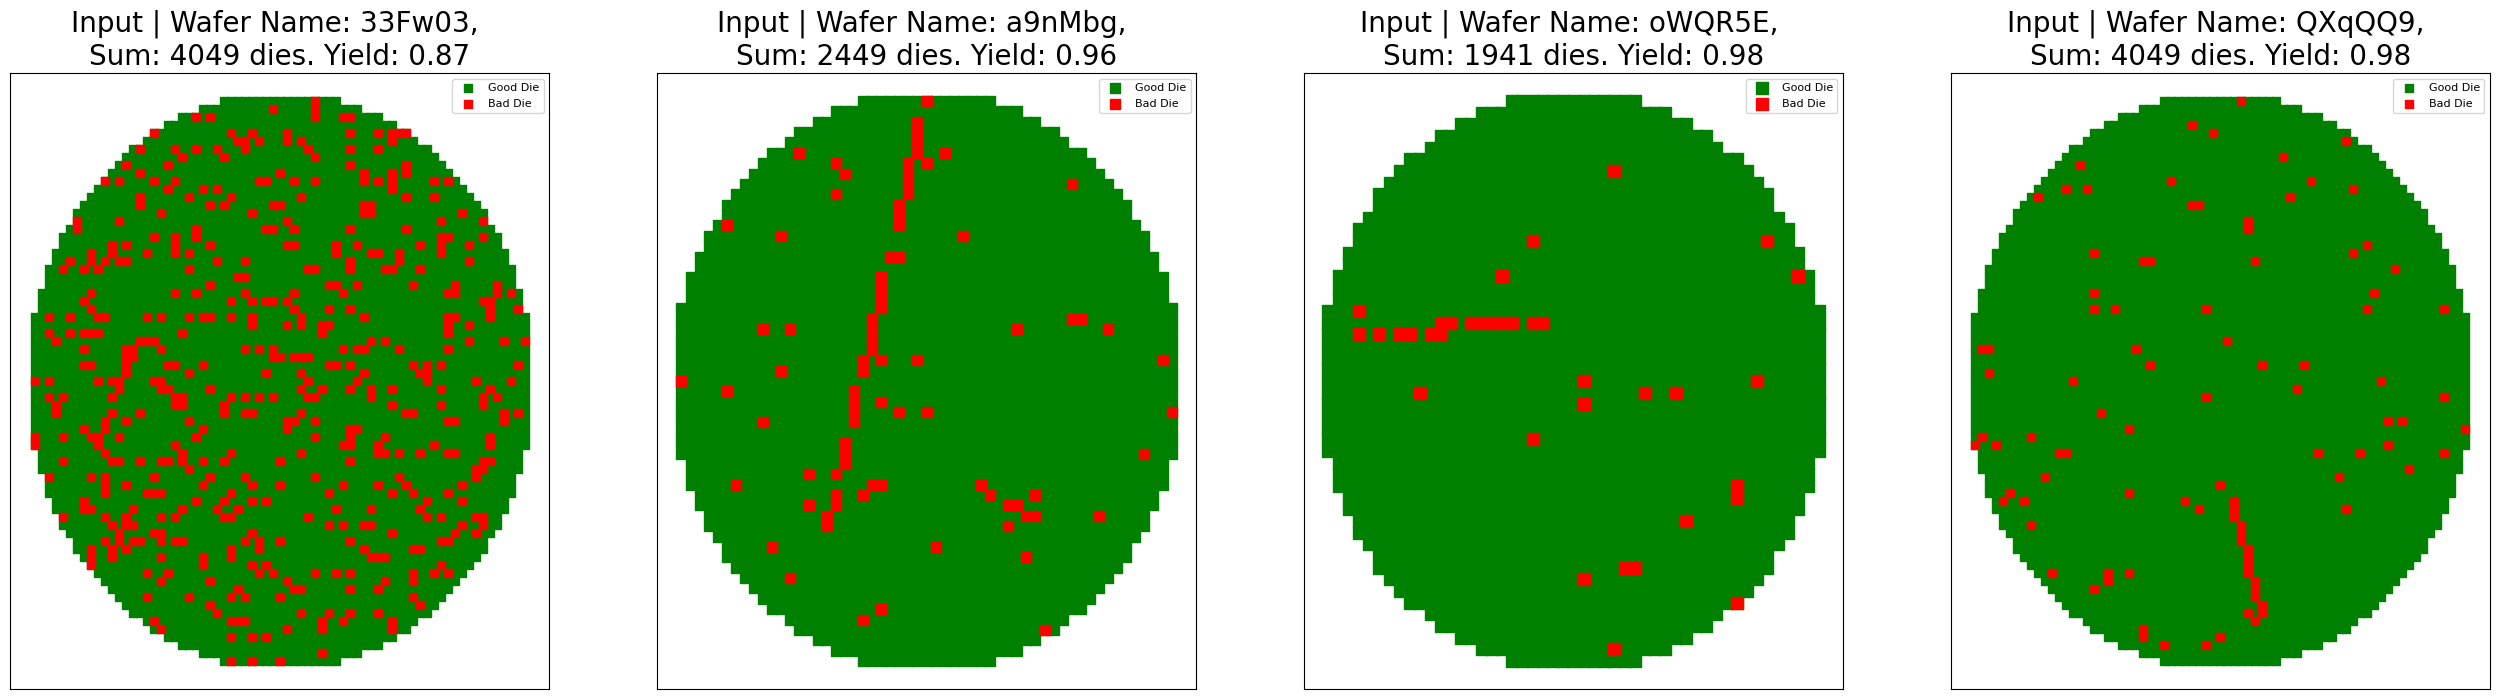

In [7]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

1. Data Exploration

In [8]:
df_wafers.info()
print()
num_dups = df_wafers.duplicated().sum()
print(f"Number of duplicate rows: {num_dups}\n")

num_wafers = df_wafers['WaferName'].nunique()
print(f"Number of wafers: {num_wafers}")

total_dies = len(df_wafers)
print(f"Total dies: {total_dies}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415400 entries, 0 to 10415399
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   WaferName     object
 1   DieX          int64 
 2   DieY          int64 
 3   IsGoodDie     bool  
 4   IsScratchDie  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 258.3+ MB

Number of duplicate rows: 0

Number of wafers: 4200
Total dies: 10415400


2.

In [10]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import random
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score
import itertools



## FINDING BAD WAFERS
'''
Removes wafers whose bad-die yield exceeds bad_yield_threshold
'''
def filter_out_bad_wafers(df, bad_yield_threshold=0.05):
    yield_df = (
        df
        .groupby('WaferName')['IsGoodDie']
        .mean()
        .reset_index()
        .rename(columns={'IsGoodDie': 'good_yield'})
    )

    yield_df['bad_yield'] = 1 - yield_df['good_yield']
    bad_wafers = yield_df.loc[yield_df['bad_yield'] > bad_yield_threshold, 'WaferName'].tolist()
    filtered_df = df.loc[~df['WaferName'].isin(bad_wafers)].copy()
    
    return filtered_df, bad_wafers


# Filter out the high bad_yield wafers
df_wafers_filtered, bad_wafers = filter_out_bad_wafers(df_wafers, bad_yield_threshold=0.05)


# Determine image dimensions from the data (even dimensions)
W0 = df_wafers_filtered['DieX'].max() + 1
H0 = df_wafers_filtered['DieY'].max() + 1

W = W0 if (W0 % 2 == 0) else W0 + 1
H = H0 if (H0 % 2 == 0) else H0 + 1


def wafer_to_tensor(df_wafer):
    img = np.zeros((2, H, W), dtype=np.float32)

    bad = df_wafer.loc[~df_wafer.IsGoodDie]
    img[0, bad.DieY, bad.DieX] = 1.0

    good = df_wafer.loc[df_wafer.IsGoodDie]
    img[1, good.DieY, good.DieX] = 1.0
    return img  


# Create the target mask for a wafer
def scratch_mask(df_wafer):
    mask = np.zeros((H, W), dtype=np.float32)
    scratched = df_wafer.loc[df_wafer.IsScratchDie]
    mask[scratched.DieY, scratched.DieX] = 1.0
    return mask


# Custom Dataset
class WaferDataset(Dataset):
    def __init__(self, df, wafer_names):
        self.df = df
        self.wafer_names = wafer_names

    def __len__(self):
        return len(self.wafer_names)

    def __getitem__(self, idx):
        wafer_name = self.wafer_names[idx]
        df_wafer = self.df[self.df.WaferName == wafer_name]
        
        # Convert wafer to image and mask
        img = wafer_to_tensor(df_wafer)
        mask = scratch_mask(df_wafer)
        
        # Convert to torch tensors
        img_tensor = torch.from_numpy(img)
        mask_tensor = torch.from_numpy(mask)
        return img_tensor, mask_tensor


##################### SPLITTING TO TRAIN, TEST, VALIDATION
all_wafers = df_wafers_filtered['WaferName'].unique()
all_wafers = list(all_wafers)
random.seed(42)
random.shuffle(all_wafers)

# 70% train, 20% val, 10% test split
num_wafers = len(all_wafers)
train_count = int(0.7 * num_wafers)
val_count = int(0.2 * num_wafers)
test_count = num_wafers - train_count - val_count

train_wafers = all_wafers[:train_count]
val_wafers = all_wafers[train_count:train_count+val_count]
test_wafers = all_wafers[train_count+val_count:]
print(f"Total wafers: {num_wafers}")
print(f"Train: {len(train_wafers)}, Val: {len(val_wafers)}, Test: {len(test_wafers)}")


train_dataset = WaferDataset(df_wafers_filtered, train_wafers)
val_dataset = WaferDataset(df_wafers_filtered, val_wafers)
test_dataset = WaferDataset(df_wafers_filtered, test_wafers)

batch_size = 16 # Placeholder - will be overwritten in grid search  
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


##################### CNN IMPLEMENTATION
class ScratchCNN(nn.Module):
    def __init__(self, dropout_rate=0.1):
        super(ScratchCNN, self).__init__()

        self.enc_conv1 = nn.Conv2d(2, 16, kernel_size=3, padding=1)
        self.enc_conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)

        self.enc_conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.enc_conv4 = nn.Conv2d(32, 32, kernel_size=3, padding=1)

        self.upconv = nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2)

        self.dec_conv1 = nn.Conv2d(16+16, 16, kernel_size=3, padding=1)
        self.dec_conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)

        # Output
        self.out_conv = nn.Conv2d(16, 1, kernel_size=1)
        # Dropout
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x1 = F.relu(self.enc_conv1(x))
        x1 = F.relu(self.enc_conv2(x1))
        x1_pool = self.pool(x1)

        x2 = F.relu(self.enc_conv3(x1_pool))
        x2 = F.relu(self.enc_conv4(x2))

        x2_up = self.upconv(x2)
        x_cat = torch.cat([x1, x2_up], dim=1)

        x_cat = self.dropout(x_cat)
        x3 = F.relu(self.dec_conv1(x_cat))
        x3 = F.relu(self.dec_conv2(x3))

        out = self.out_conv(x3)
        return out


################### TRAINING
def compute_f1(pred_mask, true_mask):
    pred_mask_flat = pred_mask.flatten().cpu().numpy()
    true_mask_flat = true_mask.flatten().cpu().numpy()
    return f1_score(true_mask_flat, pred_mask_flat, average='binary', zero_division=0)


def train_model(model, train_loader, val_loader, optimizer, num_epochs=20, patience=5):
    criterion = nn.BCEWithLogitsLoss()
    best_f1 = 0.0
    best_model_state = None
    patience_counter = 0

    # To track metrics per epoch
    history = {'train_loss': [], 'val_loss': [], 'val_f1': []}

    for epoch in range(1, num_epochs+1):
        model.train()
        running_loss = 0.0

        for images, masks in tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", leave=False):
            images = images.to(device)
            masks = masks.to(device)

            optimizer.zero_grad()
            logits = model(images)
            loss = criterion(logits, masks.unsqueeze(1))
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        # Average training loss for the epoch
        epoch_train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(epoch_train_loss)

        # Validation step (no gradient)
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_true = []
        with torch.no_grad():
            for images, masks in val_loader:
                images = images.to(device)
                masks = masks.to(device)
                logits = model(images)

                loss = criterion(logits, masks.unsqueeze(1))
                val_loss += loss.item() * images.size(0)

                prob = torch.sigmoid(logits)
                pred = (prob >= 0.5).long()

                all_preds.append(pred.cpu().numpy())
                all_true.append(masks.cpu().numpy())

        epoch_val_loss = val_loss / len(val_loader.dataset)
        history['val_loss'].append(epoch_val_loss)

        all_preds = np.concatenate(all_preds).flatten()
        all_true = np.concatenate(all_true).flatten()
        val_f1 = f1_score(all_true, all_preds, average='binary', zero_division=0)
        history['val_f1'].append(val_f1)

        print(f"Epoch {epoch}: train_loss={epoch_train_loss:.4f}, val_loss={epoch_val_loss:.4f}, val_F1={val_f1:.4f}")

        # Early stopping
        if val_f1 > best_f1:
            best_f1 = val_f1
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered after {epoch} epochs.")
                break

    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    return model, best_f1, history


################ GRID SEARCH
# Check with different hyper-params
learning_rates = [1e-3]
dropout_rates = [0.1]
batch_sizes = [8]

best_val_f1 = 0.0
best_params = None
best_model = None

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for lr, dr, bs in itertools.product(learning_rates, dropout_rates, batch_sizes):
    print(f"\nTraining model with lr={lr}, dropout={dr}, batch_size={bs}")

    train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=False)

    model = ScratchCNN(dropout_rate=dr).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    model_trained, val_f1, history = train_model(model, train_loader, val_loader, optimizer, num_epochs=50, patience=5)

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_params = {'learning_rate': lr, 'dropout': dr, 'batch_size': bs}
        best_model = model_trained
        torch.save(best_model.state_dict(), "best_model.pth")

################# Compute f1 score on test set
model = ScratchCNN(dropout_rate=best_params['dropout'])
model.load_state_dict(torch.load("best_model.pth", map_location=device))
model.to(device)
model.eval()

all_preds = []
all_true = []
with torch.no_grad():
    for images, masks in test_loader:
        images = images.to(device)
        masks = masks.to(device)
        logits = model(images)
        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).long()
        all_preds.append(preds.cpu().numpy())
        all_true.append(masks.cpu().numpy())

all_preds = np.concatenate(all_preds).flatten()
all_true = np.concatenate(all_true).flatten()
test_f1 = f1_score(all_true, all_preds, average='binary', zero_division=0)
print(f"Test F1-score: {test_f1:.4f}")

Raster images will be 72×72 (even dimensions)
Total wafers: 3686
Train: 2580, Val: 737, Test: 369

Training model with lr=0.001, dropout=0.1, batch_size=8


Epoch 1: train_loss=0.0510, val_loss=0.0071, val_F1=0.2704


Epoch 2: train_loss=0.0065, val_loss=0.0049, val_F1=0.7348


Epoch 3: train_loss=0.0041, val_loss=0.0032, val_F1=0.8168


Epoch 4: train_loss=0.0029, val_loss=0.0024, val_F1=0.8677


Epoch 5: train_loss=0.0025, val_loss=0.0022, val_F1=0.8826


Epoch 6: train_loss=0.0023, val_loss=0.0022, val_F1=0.8857


Epoch 7: train_loss=0.0021, val_loss=0.0020, val_F1=0.8936


Epoch 8: train_loss=0.0020, val_loss=0.0019, val_F1=0.8951


Epoch 9: train_loss=0.0019, val_loss=0.0019, val_F1=0.8998


Epoch 10: train_loss=0.0018, val_loss=0.0018, val_F1=0.9012


Epoch 11: train_loss=0.0018, val_loss=0.0018, val_F1=0.9019


Epoch 12: train_loss=0.0017, val_loss=0.0019, val_F1=0.9028


Epoch 13: train_loss=0.0017, val_loss=0.0019, val_F1=0.9019


Epoch 14: train_loss=0.0016, val_loss=0.0017, val_F1=0.9080


Epoch 15: train_loss=0.0016, val_loss=0.0017, val_F1=0.9082


Epoch 16: train_loss=0.0016, val_loss=0.0016, val_F1=0.9091


Epoch 17: train_loss=0.0015, val_loss=0.0017, val_F1=0.9095


Epoch 18: train_loss=0.0015, val_loss=0.0017, val_F1=0.9110


Epoch 19: train_loss=0.0015, val_loss=0.0017, val_F1=0.9118


Epoch 20: train_loss=0.0014, val_loss=0.0017, val_F1=0.9099


Epoch 21: train_loss=0.0014, val_loss=0.0016, val_F1=0.9152


Epoch 22: train_loss=0.0014, val_loss=0.0016, val_F1=0.9141


Epoch 23: train_loss=0.0014, val_loss=0.0016, val_F1=0.9149


Epoch 24: train_loss=0.0014, val_loss=0.0016, val_F1=0.9150


Epoch 25: train_loss=0.0013, val_loss=0.0016, val_F1=0.9159


Epoch 26: train_loss=0.0013, val_loss=0.0017, val_F1=0.9093


Epoch 27: train_loss=0.0013, val_loss=0.0016, val_F1=0.9172


Epoch 28: train_loss=0.0012, val_loss=0.0016, val_F1=0.9161


Epoch 29: train_loss=0.0012, val_loss=0.0016, val_F1=0.9156


Epoch 30: train_loss=0.0012, val_loss=0.0016, val_F1=0.9182


Epoch 31: train_loss=0.0012, val_loss=0.0017, val_F1=0.9122


Epoch 32: train_loss=0.0012, val_loss=0.0016, val_F1=0.9160


Epoch 33: train_loss=0.0011, val_loss=0.0017, val_F1=0.9156


Epoch 34: train_loss=0.0011, val_loss=0.0016, val_F1=0.9153


Epoch 35: train_loss=0.0011, val_loss=0.0016, val_F1=0.9171
Early stopping triggered after 35 epochs.
Finished training: val_F1=0.9182
New best model saved with F1 0.9182

Best validation F1: 0.9182 with parameters: {'learning_rate': 0.001, 'dropout': 0.1, 'batch_size': 8}
Test F1-score: 0.9163


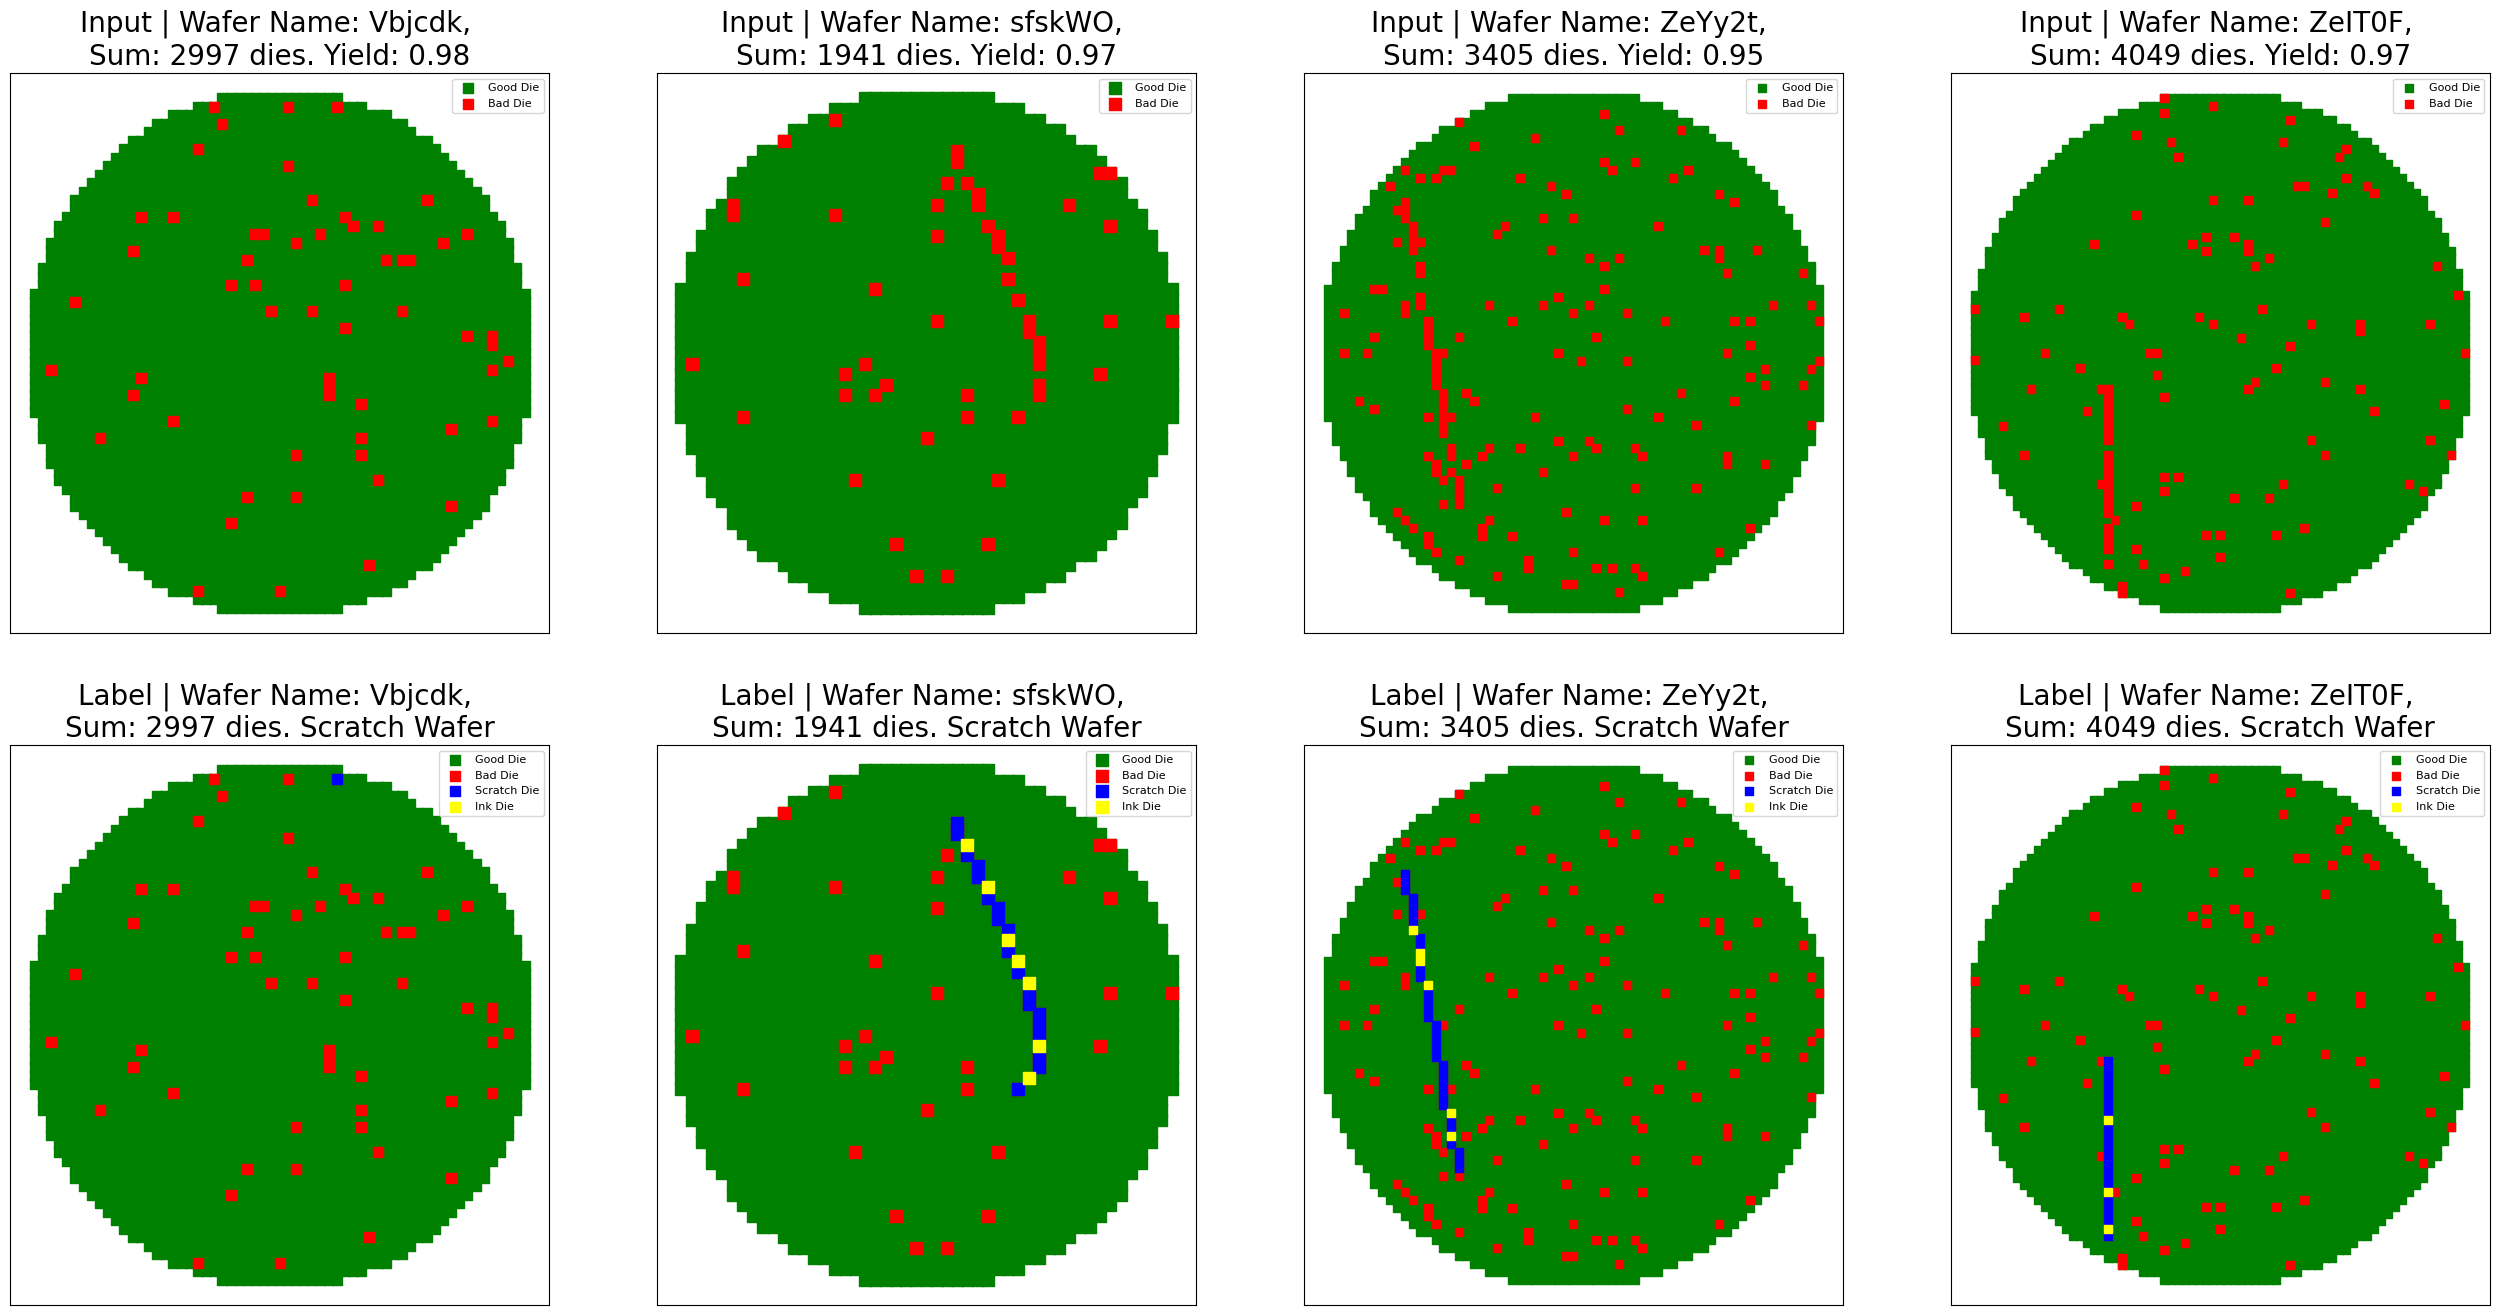

In [18]:
## SANITY CHECK
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

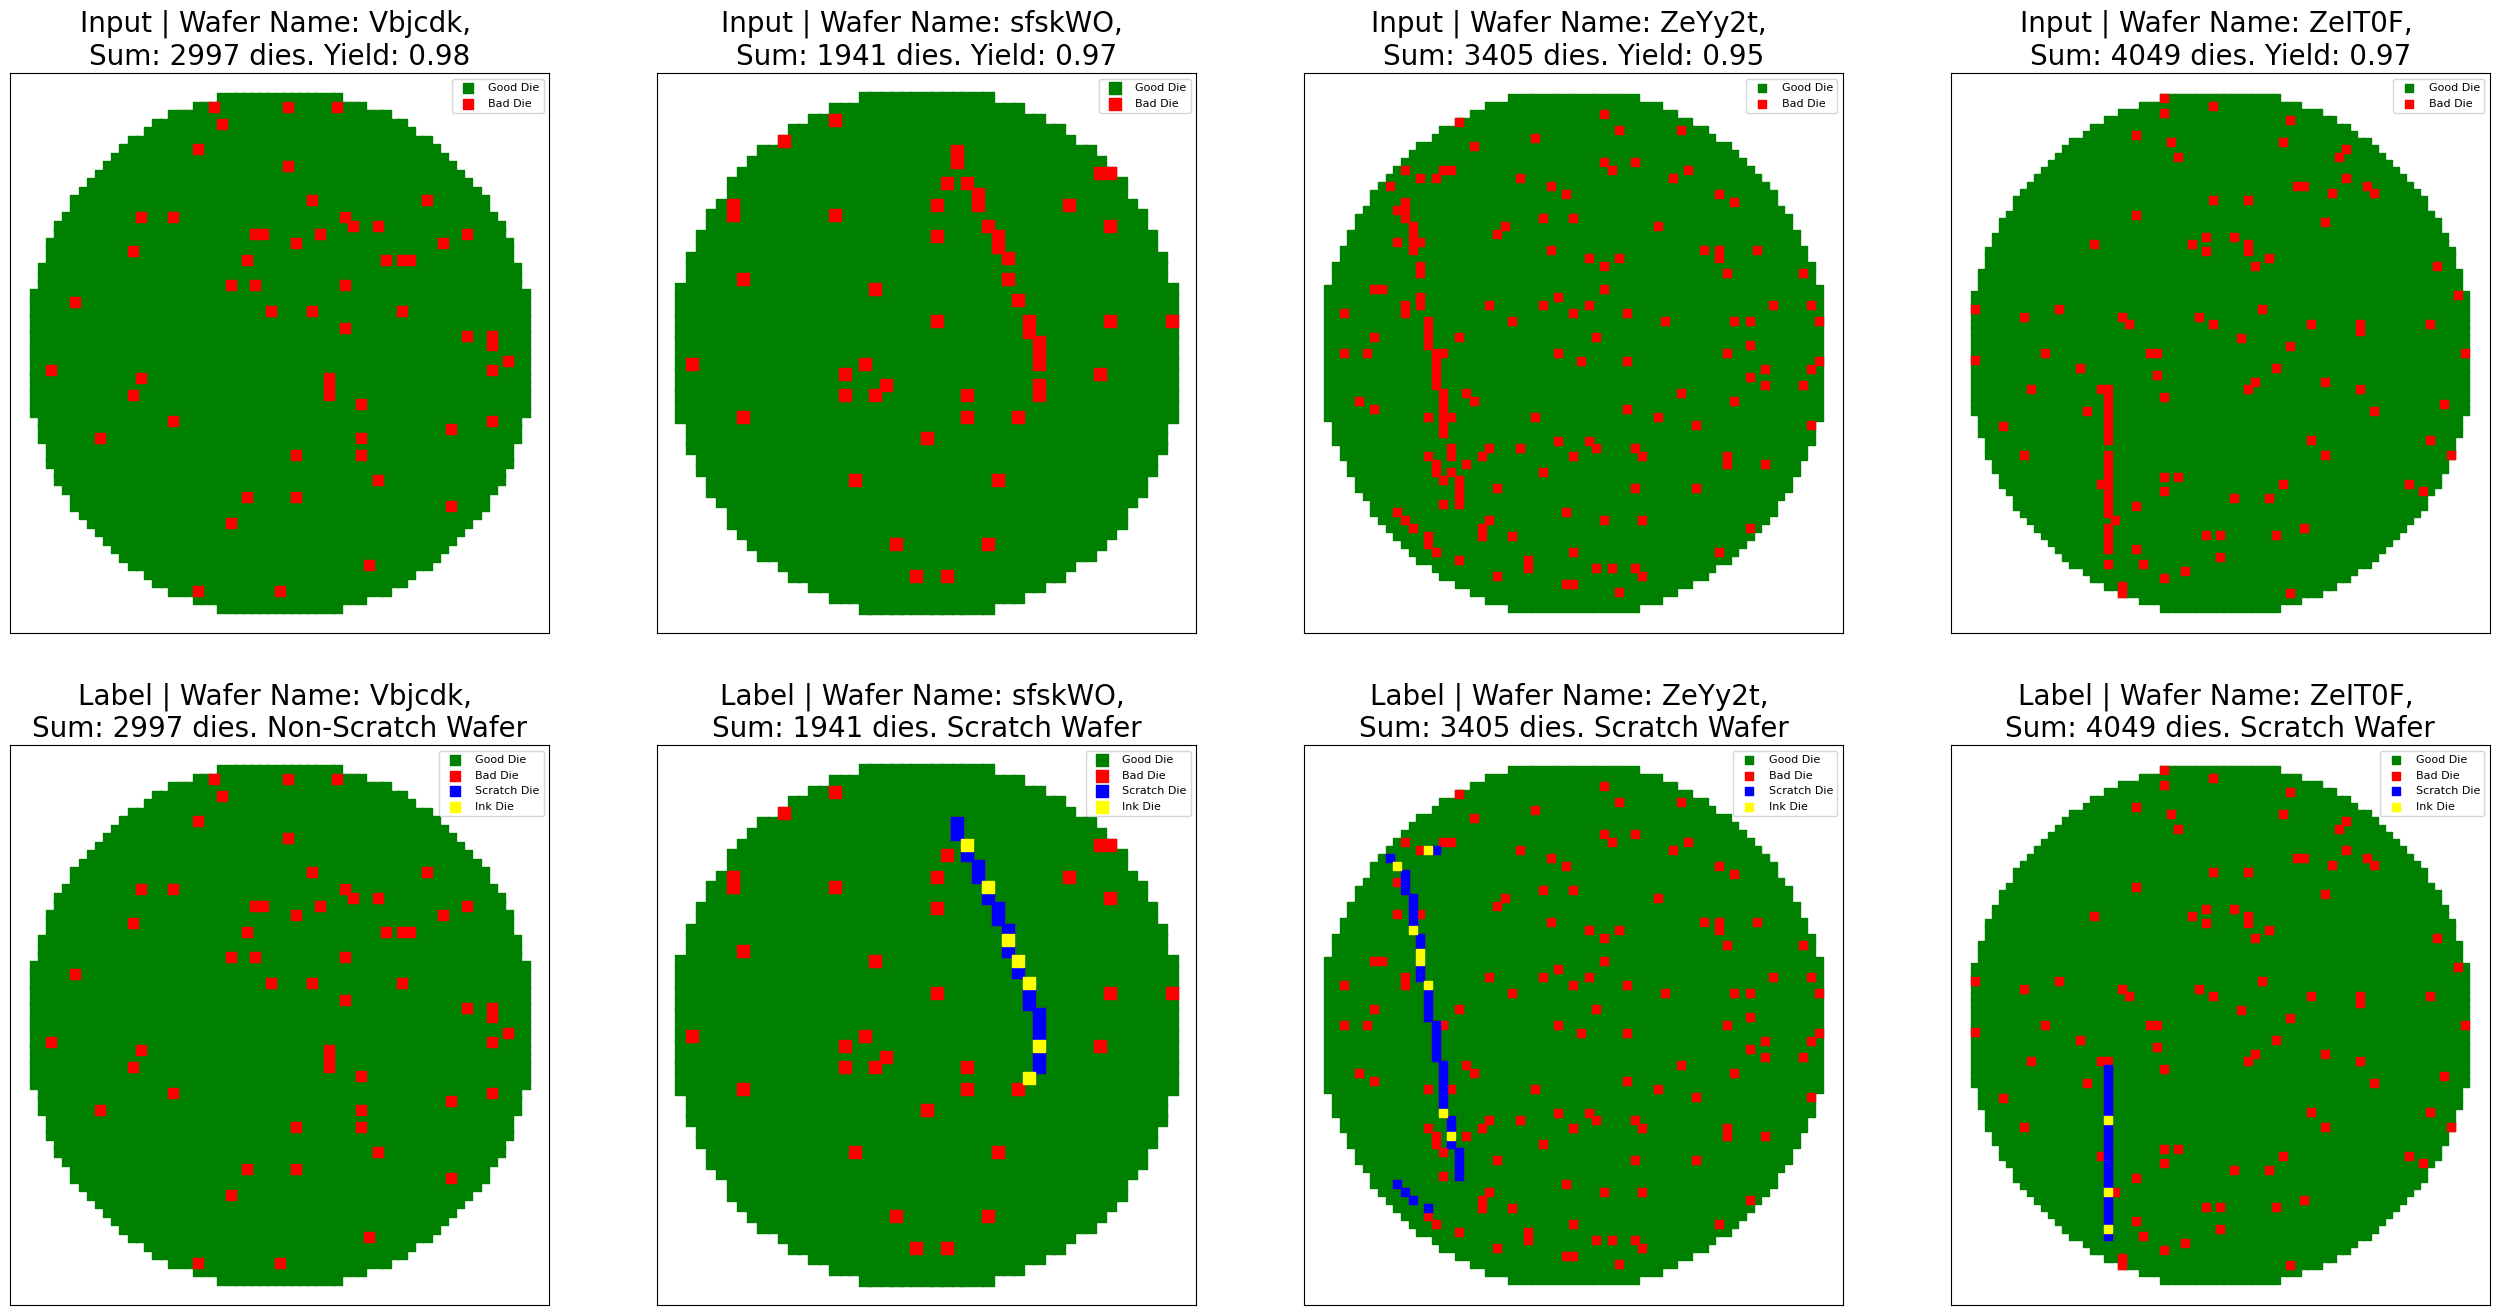

In [19]:
## SANITY CHECK - what did my model say?
list_sample_pred = []
for dfw in list_sample_train:
    dfp = dfw.copy()
    img = wafer_to_tensor(dfp)
    inp = torch.from_numpy(img).unsqueeze(0).to(device)
    with torch.no_grad():
        logits = model(inp)
        probs = torch.sigmoid(logits)[0,0].cpu().numpy()
    mask = probs > 0.5
    xs, ys = dfp['DieX'].values, dfp['DieY'].values
    dfp['IsScratchDie'] = mask[ys, xs]
    list_sample_pred.append(dfp)
plot_wafer_maps(list_sample_pred, figsize=8, labels=True)


In [31]:
'''
Returns array of scratch predictions
'''
def predict_scratch_vector(df, model, bad_wafers, device, n_wafers=None):
    wafers = df['WaferName'].unique()
    if n_wafers is not None:
        wafers = wafers[:n_wafers]

    preds = np.zeros(len(df), dtype=bool)
    model.eval()

    for wafer in tqdm(wafers, desc="Predicting wafers"):
        mask_rows = (df['WaferName'] == wafer)
        if wafer in bad_wafers:
            # Bad wafers get all dies false
            continue

        wafer_df = df[mask_rows]
        img_np = wafer_to_tensor(wafer_df)
        inp = torch.from_numpy(img_np).unsqueeze(0).to(device)

        with torch.no_grad():
            logits = model(inp)
            probs  = torch.sigmoid(logits)[0,0].cpu().numpy()

        mask_bool = probs > 0.5
        xs, ys = wafer_df['DieX'].values, wafer_df['DieY'].values
        preds[mask_rows.values] = mask_bool[ys, xs]

    return preds

df_wafers_test_filtered, bad_test_wafers = filter_out_bad_wafers(df_wafers_test, bad_yield_threshold=0.05)

# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.


When starting to work on the problem, after some exploration, I started thinking of the architecture of the solution.
Firstly it makes sense to filter the data initially, we could calculate the yield of the wafer and if it is too low we will determine it as bad. This allign with th e business goals mentioned in the task description. Later down the pipeline I thought of implementing a CNN, seeing it was used in research of the topic (Hidden Wafer Scratch Defects Projection for Diagnosis and Quality Enhancement, https://ieeexplore.ieee.org/abstract/document/9273073)

In my courses most of our assignments were class detection (CIFAR-10 or MNIST datasets), so we focused a lot on validation accuracy, by this I mean the percentage of correct results divided by all attempts. In this case the accuracy isn't that crucial since the scratch affects a small number of dies (a model simply writing false for each die will get 90%+ accuracy), so after looking into it, I decided to use the F1 score as a metric to see if my model is doing well (and achieving > 0.9 which is considered good). I also used Binary Cross-Entropy loss which is a standard loss in these cases of binary classification.

I chose to split the data into 70% train, 20% validation and 10% test, the validation set could help me see the f1 score of my model while training. I also used early stopping to prevent overfitting, and implemented a grid search to find the best hyper-parameters for the model In theory it would be best to try different learning rates, dropout rates and batch sizes. In practice, I have a bad computer, and ran this entire assignment through my CPU, so I chose default values (but my code allows for adding more values and performing a proper grid search). Hyperparams - learning rate 0.001, dropout 0.1 and batch size 8. Adam was my chosen optimizer since from my understanding it is a state of the art optimizer for most cases. The code also saves the best model - best_model.pth - seeing you only wanted the zip to include the notebook and csv I didn't attach it (running the code again will generate it).

If I was working on this with a team firstly I would discuss the problem with my team and see if they have any ideas or suggestions, especially people who have experience with wafer-prediction tasks in the past. They could have helped me come to my solution faster and explain terms I didn't understand in a better way, or perhaps offer a better architecture which I didn't come up with.

I appreciate the opportunity to work on this assignment, and I hope you find my solution satisfactory. I am looking forward to hearing back from you.

# Submission

In [33]:
IsScratchDie = predict_scratch_vector(df_wafers_test, model, bad_test_wafers, device)
df_wafers_test['IsScratchDie'] = IsScratchDie

name = 'Amit Ben Zaken'
email = 'amitlevy123@hotmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)

Predicting wafers: 100%|██████████| 455/455 [00:22<00:00, 20.24it/s]


Saved file: 20250506_Amit Ben Zaken_amitlevy123@hotmail.com_df_wafers_test_with_preds.csv
